# PANDAS - UMA BREVE INTRODUÇÃO

Este é um breve tutorial de Pandas, dentro do contexto do Grupo de Estudos em programação científica com Python, SciPy SP.

**Autor**: Patricia Novais

Dezembro de 2016

**---------------------------------------------------------------------**


A primeira coisa a fazer é importar os pacotes necessários:


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Precisamos dizer ao Jupyter que os plots serão renderizados aqui:

In [3]:
%matplotlib inline

## Abrindo os arquivos de dados

O pandas possui várias opções de leitura de arquivo, que você pode conferir no link http://pandas.pydata.org/pandas-docs/stable/io.html

Aqui, iremos utilizar apenas os comandos *read_table* e *read_csv* dependendo da extenção do nosso arquivo (Se .txt ou .csv)

In [4]:
df = pd.read_csv('scipy_example_pnovais.csv')

## Visão geral dos dados

Agora que o arquivo foi lido, podemos ter um *overview* dos dados, utilizando os comandos head(), tail() e describe()

In [7]:
df.head() # exibe as primeiras 5 linhas do dataframe

,objID,u,g,r,i,z
0,588848900971299281,22.55218,21.08744,20.28041,20.04251,19.37127
1,588848900971299282,22.67882,24.14491,21.37153,20.88683,21.16393
2,588848900971299284,21.53908,22.09095,20.81463,19.83287,22.76383
3,588848900971299285,22.57927,22.40949,21.69262,20.85991,19.54916
4,588848900971299286,22.34326,22.47549,21.70187,21.27564,24.48958


In [10]:
df.tail() # exibe as últimas 5 linhas do dataframe

,objID,u,g,r,i,z
995,588848900971561128,21.77360,20.50731,20.99524,18.81902,20.07818
996,588848900971561131,24.20203,22.59931,21.91894,23.26985,22.23001
997,588848900971561133,27.88187,24.20264,22.15804,21.01927,22.81669
998,588848900971561134,26.54534,22.41273,21.62476,21.25577,21.04195
999,588848900971561142,24.82389,19.18991,18.09366,17.92763,17.69641


In [11]:
df.describe() #faz uma breve descrição dos dados, através de média, min, max, desvio padrão...

,objID,u,g,r,i,z
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.888489e+17,23.494416,22.421346,21.162885,21.070447,20.603184
std,7.197984e+04,1.871991,1.455900,1.096750,1.821276,1.745293
min,5.888489e+17,17.648830,15.364420,14.378490,13.892320,13.582260
25%,5.888489e+17,22.186037,21.777965,20.711615,20.217710,19.676517
50%,5.888489e+17,23.057755,22.410130,21.373365,20.939620,20.328020
75%,5.888489e+17,24.627623,23.004250,21.793685,21.518805,21.240655
max,5.888489e+17,30.902530,31.013420,30.592960,31.477660,29.166450


## Criando condições, fatiando, unindo...


Todos os comandos acima podem ser executados dado uma certa condição:

In [17]:
df[(df.u > 22) & (df.g > 22)].head() # imprime as 5 primeiras linhas dos dados cujo valor de *u* seja maior do que 22

,objID,u,g,r,i,z
1,588848900971299282,22.67882,24.14491,21.37153,20.88683,21.16393
3,588848900971299285,22.57927,22.40949,21.69262,20.85991,19.54916
4,588848900971299286,22.34326,22.47549,21.70187,21.27564,24.48958
5,588848900971299290,24.12965,23.06622,21.27620,20.61665,20.08728
7,588848900971299296,24.47968,22.36202,21.66306,21.68572,22.54993


In [16]:
df[(df.u > 22) & (df.g > 22)].describe() # descrição dos dados cujo valor de *u* seja maior do que 22

,objID,u,g,r,i,z
count,6.240000e+02,624.000000,624.000000,624.000000,624.000000,624.000000
mean,5.888489e+17,24.071664,23.020400,21.599214,21.488588,21.043922
std,7.491249e+04,1.591710,1.017580,0.543982,1.422116,1.507475
min,5.888489e+17,22.012680,22.004320,18.470430,18.353240,18.060610
25%,5.888489e+17,22.747073,22.391710,21.278022,20.744808,20.075865
50%,5.888489e+17,23.682755,22.723370,21.623560,21.197100,20.622955
75%,5.888489e+17,24.923278,23.348722,21.942227,21.695617,21.659965
max,5.888489e+17,30.228790,31.013420,23.297070,30.196820,29.166450


Algo muito útil é poder fatiar seus dados, separar apenas aquilo que interessa. Existem alguns modos de fatiar os dados (do inglês, **slice**), mas usaremos basicamente o comando .ix(). Para estudar os demais, consulte http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [18]:
df1 = df.ix[:,1:] #selecionando todas as colunas a partir da coluna 1 (lembrando que a indexação do Python começa em 0)
df1.head()

,u,g,r,i,z
0,22.55218,21.08744,20.28041,20.04251,19.37127
1,22.67882,24.14491,21.37153,20.88683,21.16393
2,21.53908,22.09095,20.81463,19.83287,22.76383
3,22.57927,22.40949,21.69262,20.85991,19.54916
4,22.34326,22.47549,21.70187,21.27564,24.48958


In [20]:
df2 = df.ix[:,(1,3,5)] #selecionando apenas as colunas 1, 3 e 5
df2.head()

,u,r,z
0,22.55218,20.28041,19.37127
1,22.67882,21.37153,21.16393
2,21.53908,20.81463,22.76383
3,22.57927,21.69262,19.54916
4,22.34326,21.70187,24.48958


In [25]:
df3 = df.ix[:,('u','r','z')] #selecionando apenas as colunas 1, 3 e 5, mas utilizando o nome das colunas
df3.head()

,u,r,z
0,22.55218,20.28041,19.37127
1,22.67882,21.37153,21.16393
2,21.53908,20.81463,22.76383
3,22.57927,21.69262,19.54916
4,22.34326,21.70187,24.48958


In [26]:
df4 = df.ix[:,(0,2)]
df4.head()

,objID,g
0,588848900971299281,21.08744
1,588848900971299282,24.14491
2,588848900971299284,22.09095
3,588848900971299285,22.40949
4,588848900971299286,22.47549


Ainda, podemos fazer o contrário, juntar dados num mesmo dataframe. Para ter toda a documentação de concatenação, fusão e junção de dados, consulte http://pandas.pydata.org/pandas-docs/stable/merging.html

Se os dados não possuem nenhuma coluna em comum, podemos utilizar o comando **join()**

In [27]:
df4.head()

,objID,g
0,588848900971299281,21.08744
1,588848900971299282,24.14491
2,588848900971299284,22.09095
3,588848900971299285,22.40949
4,588848900971299286,22.47549


In [28]:
df3.head()

,u,r,z
0,22.55218,20.28041,19.37127
1,22.67882,21.37153,21.16393
2,21.53908,20.81463,22.76383
3,22.57927,21.69262,19.54916
4,22.34326,21.70187,24.48958


In [29]:
df5 = df4.join(df3)
df5.head()

,objID,g,u,r,z
0,588848900971299281,21.08744,22.55218,20.28041,19.37127
1,588848900971299282,24.14491,22.67882,21.37153,21.16393
2,588848900971299284,22.09095,21.53908,20.81463,22.76383
3,588848900971299285,22.40949,22.57927,21.69262,19.54916
4,588848900971299286,22.47549,22.34326,21.70187,24.48958


In [30]:
df55 = df3.join(df4)
df55.head()

,u,r,z,objID,g
0,22.55218,20.28041,19.37127,588848900971299281,21.08744
1,22.67882,21.37153,21.16393,588848900971299282,24.14491
2,21.53908,20.81463,22.76383,588848900971299284,22.09095
3,22.57927,21.69262,19.54916,588848900971299285,22.40949
4,22.34326,21.70187,24.48958,588848900971299286,22.47549


Outra opção é utilizar o **concat()**

In [31]:
df6 = pd.concat([df4,df3],axis=1) #axis=1 diz q a concatenação vai acontecer entre as colunas e não entre as linhas
df6.head()

,objID,g,u,r,z
0,588848900971299281,21.08744,22.55218,20.28041,19.37127
1,588848900971299282,24.14491,22.67882,21.37153,21.16393
2,588848900971299284,22.09095,21.53908,20.81463,22.76383
3,588848900971299285,22.40949,22.57927,21.69262,19.54916
4,588848900971299286,22.47549,22.34326,21.70187,24.48958


In [32]:
df66 = pd.concat([df3,df4], axis=1)
df66.head()

,u,r,z,objID,g
0,22.55218,20.28041,19.37127,588848900971299281,21.08744
1,22.67882,21.37153,21.16393,588848900971299282,24.14491
2,21.53908,20.81463,22.76383,588848900971299284,22.09095
3,22.57927,21.69262,19.54916,588848900971299285,22.40949
4,22.34326,21.70187,24.48958,588848900971299286,22.47549


Quando os dataframes possuem ao menos uma coluna em comum, é possível utilizar o comando **merge()**

In [33]:
df1.head()

,u,g,r,i,z
0,22.55218,21.08744,20.28041,20.04251,19.37127
1,22.67882,24.14491,21.37153,20.88683,21.16393
2,21.53908,22.09095,20.81463,19.83287,22.76383
3,22.57927,22.40949,21.69262,20.85991,19.54916
4,22.34326,22.47549,21.70187,21.27564,24.48958


In [34]:
df4.head()

,objID,g
0,588848900971299281,21.08744
1,588848900971299282,24.14491
2,588848900971299284,22.09095
3,588848900971299285,22.40949
4,588848900971299286,22.47549


In [35]:
df7 = pd.merge(df1,df4) #perceba que a ordem altera o resultado
df7.head()

,u,g,r,i,z,objID
0,22.55218,21.08744,20.28041,20.04251,19.37127,588848900971299281
1,22.67882,24.14491,21.37153,20.88683,21.16393,588848900971299282
2,21.53908,22.09095,20.81463,19.83287,22.76383,588848900971299284
3,22.57927,22.40949,21.69262,20.85991,19.54916,588848900971299285
4,22.34326,22.47549,21.70187,21.27564,24.48958,588848900971299286


In [36]:
df8 = pd.merge(df4,df1) #perceba que a ordem altera o resultado
df8.head()

,objID,g,u,r,i,z
0,588848900971299281,21.08744,22.55218,20.28041,20.04251,19.37127
1,588848900971299282,24.14491,22.67882,21.37153,20.88683,21.16393
2,588848900971299284,22.09095,21.53908,20.81463,19.83287,22.76383
3,588848900971299285,22.40949,22.57927,21.69262,20.85991,19.54916
4,588848900971299286,22.47549,22.34326,21.70187,21.27564,24.48958


Podemos criar novas colunas a partir da manipulação de outras colunas

In [37]:
df['gr'] = df.g - df.r
df.head()

,objID,u,g,r,i,z,gr
0,588848900971299281,22.55218,21.08744,20.28041,20.04251,19.37127,0.80703
1,588848900971299282,22.67882,24.14491,21.37153,20.88683,21.16393,2.77338
2,588848900971299284,21.53908,22.09095,20.81463,19.83287,22.76383,1.27632
3,588848900971299285,22.57927,22.40949,21.69262,20.85991,19.54916,0.71687
4,588848900971299286,22.34326,22.47549,21.70187,21.27564,24.48958,0.77362


In [38]:
df['ri'] = df.r - df.i
df.head()

,objID,u,g,r,i,z,gr,ri
0,588848900971299281,22.55218,21.08744,20.28041,20.04251,19.37127,0.80703,0.23790
1,588848900971299282,22.67882,24.14491,21.37153,20.88683,21.16393,2.77338,0.48470
2,588848900971299284,21.53908,22.09095,20.81463,19.83287,22.76383,1.27632,0.98176
3,588848900971299285,22.57927,22.40949,21.69262,20.85991,19.54916,0.71687,0.83271
4,588848900971299286,22.34326,22.47549,21.70187,21.27564,24.48958,0.77362,0.42623


In [39]:
df['ur'] = df.u - df.r
df.head()

,objID,u,g,r,i,z,gr,ri,ur
0,588848900971299281,22.55218,21.08744,20.28041,20.04251,19.37127,0.80703,0.23790,2.27177
1,588848900971299282,22.67882,24.14491,21.37153,20.88683,21.16393,2.77338,0.48470,1.30729
2,588848900971299284,21.53908,22.09095,20.81463,19.83287,22.76383,1.27632,0.98176,0.72445
3,588848900971299285,22.57927,22.40949,21.69262,20.85991,19.54916,0.71687,0.83271,0.88665
4,588848900971299286,22.34326,22.47549,21.70187,21.27564,24.48958,0.77362,0.42623,0.64139


## Estatísticas básicas


O pandas permite ainda algumas estatísticas básicas bastante úteis, como **média**, **desvio padrão**, **soma**, **valor máximo**. Um rápida referência pode ser encontrada em http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

In [40]:
df.mean() # valor médio de todas as colunas do seu dataframe

objID    5.888489e+17
u        2.349442e+01
g        2.242135e+01
r        2.116289e+01
i        2.107045e+01
z        2.060318e+01
gr       1.258461e+00
ri       9.243877e-02
ur       2.331531e+00
dtype: float64

In [41]:
df3.mean()

u    23.494416
r    21.162885
z    20.603184
dtype: float64

In [42]:
df.r.mean()

21.16288531000002

In [43]:
df['r'].mean()

21.16288531000002

In [44]:
df3.r.mean()

21.16288531000002

df.median()

In [49]:
media_r = df.r.mean()
print(media_r)
a=2

21.16288531


In [50]:
df.max() # calcula o valor maximo do dataframe

objID    5.888489e+17
u        3.090253e+01
g        3.101342e+01
r        3.059296e+01
i        3.147766e+01
z        2.916645e+01
gr       1.022839e+01
ri       1.167700e+01
ur       9.220200e+00
dtype: float64

In [51]:
df.gr.max()

10.228390000000001

In [52]:
df.gr.max()

10.228390000000001

In [53]:
df.gr.min()

-6.9825100000000049

In [54]:
df.gr.var()

1.193176363880026

## Primeiros gráficos

Apesar de existir outros pacotes do python que fazem bem a tarefa de visualização de dados, o ***pandas*** pode ser bastante útil para fazer algumas análises rápidas.
Podemos plotar as correlações entre os parâmetros, criar histrogramas, boxplots, diagramas de pizza...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1203247d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121859e10>]], dtype=object)

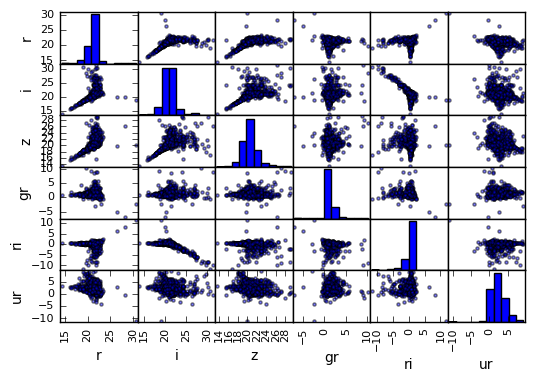

In [57]:
df = df.ix[:,1:] #tirando a primeira coluna, que não tem informação útil
pd.scatter_matrix(df) #fazendo os diagramas de dispersão de todos os parâmetros+histograma

O comando **scatter_matrix()** não produz gráficos muito elegrantes, principalmente se seu dataframe possuir muitas colunas, mas traz um noção geral dos dados.

Caso queira saber quais foram exatamente as correlações entre os parâmetros, pode-se usar o comando **corr()**

In [58]:
df.corr(method='spearman') #method : {‘pearson’, ‘kendall’, ‘spearman’}

,r,i,z,gr,ri,ur
r,1.000000,0.751534,0.705986,-0.144535,0.051741,-0.271944
i,0.751534,1.000000,0.684354,-0.062552,-0.538825,-0.214437
z,0.705986,0.684354,1.000000,-0.135227,-0.163478,-0.287139
gr,-0.144535,-0.062552,-0.135227,1.000000,-0.010070,0.183239
ri,0.051741,-0.538825,-0.163478,-0.010070,1.000000,0.012655
ur,-0.271944,-0.214437,-0.287139,0.183239,0.012655,1.000000


Para fazer os scatter_plot's individuais, podemos usar a função **plot()**, onde o parâmetro *kind* dirá o tipo de plot que queremos. Mais informações podem ser encontradas em http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot

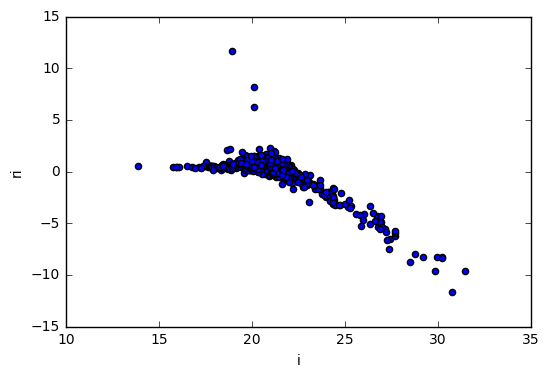

In [62]:
df.plot(kind='scatter', x='i', y='ri')

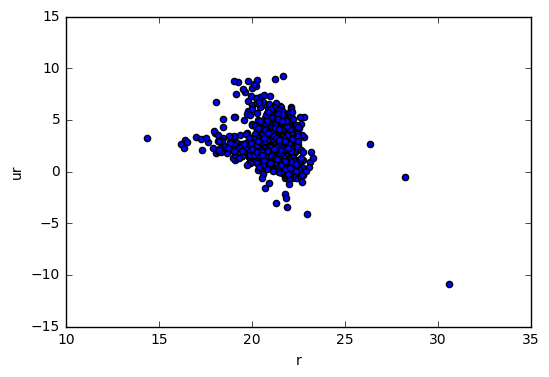

In [65]:
df.plot(kind='scatter', x='r', y='ur')

Para fazer os histogramas, podemos fazê-los todos numa mesma janela com o **df.plot(kind='hist')** ou em janela distintas com o **df.hist()**

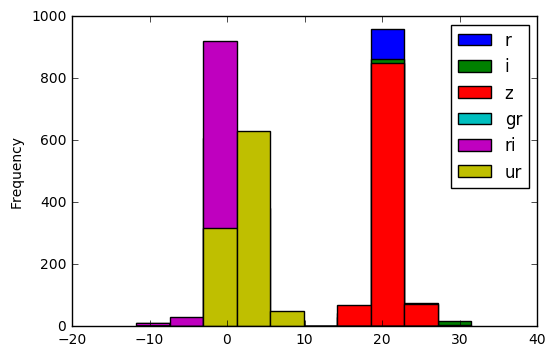

In [66]:
df.plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123a1b790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123e07250>]], dtype=object)

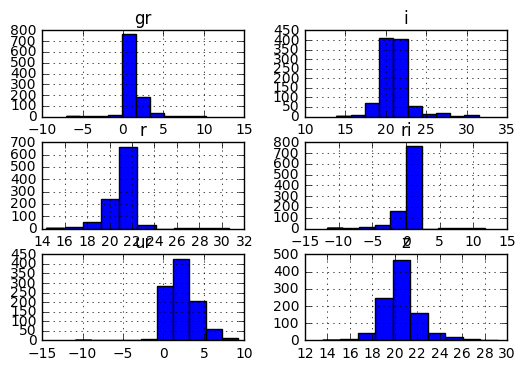

In [67]:
df.hist()

Para fazer o histograma de alguma coluna específica, podemos usar os mesmos comandos acima, mas especificando qual coluna usar

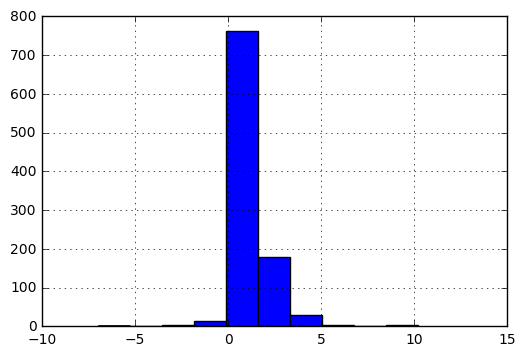

In [68]:
df.gr.hist()

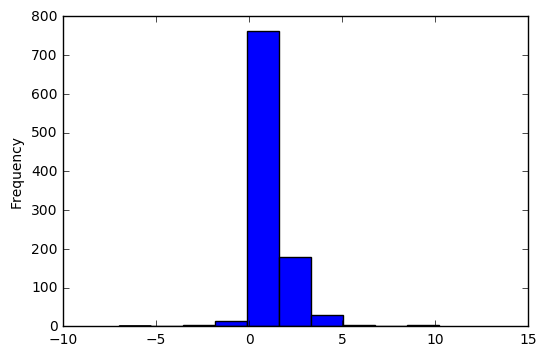

In [69]:
df.gr.plot(kind='hist')

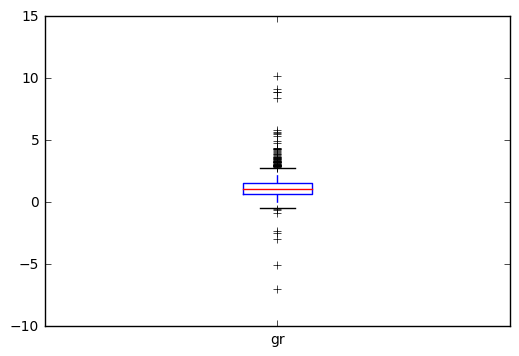

In [72]:
df.gr.plot(kind='box')

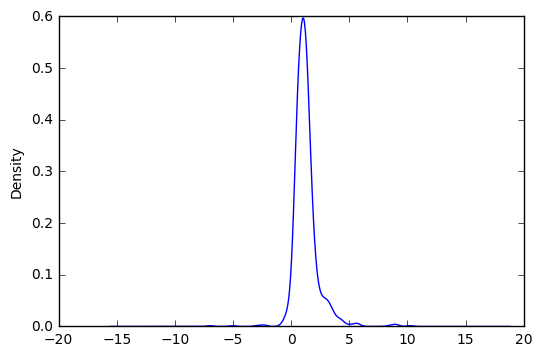

In [73]:
df.gr.plot(kind='kde')

O **pandas** é um pacote muito poderoso, o que vimos aqui é só a *ponta do iceberg*, tem muito o que ser explorado. Entretanto, espero que essa breve introdução tenha servido para mostrar que esse pacote é muito *friendly* e bacana de trabalhar. Em uma pesquisa rápida no Google é possível encontrar materiais bem avançandos sobre ele.